In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Eisenstein-Hu calculation

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/212/analytic')

In [ ]:
from ehu_transfers import Background, add_extra_parameters, LinearPower

In [ ]:
bg = Background()
bg = add_extra_parameters(bg)
ks = np.logspace(np.log10(1e-4), np.log10(1), 200)

z = 0
lp = LinearPower(bg, z, transfer='EisensteinHu')

Pk_ehu = lp(ks)

In [ ]:
plt.figure(figsize=(8, 6))
plt.loglog(ks, Pk_ehu, label='EisensteinHu Transfer')
plt.xlabel(r'$k \; [h\,\mathrm{Mpc}^{-1}]$')
plt.ylabel(r'$P(k) \; [(Mpc/h)^3]$')
plt.title('Linear Matter Power Spectrum at z = {}'.format(z))
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

# CLASS outputs

In [ ]:
%pip install classy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 13.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for classy: filename=classy-3.3.0.0-cp311-cp311-linux_x86_64.whl size=11977923 sha256=fa9b59e2abd4628da794505d5ddf9e1e023d8f0bc527479ad66ddfbc975e6622
  Stored in directory: /root/.cache/pip/wheels/98/b8/29/4fc545f931b5f16fca92543b997f87f87da8ce584f067ea8d7
Successfully built classy


In [ ]:
from classy import Class
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#all constants taken from plank 18
params = {
    'output': 'mPk', # Output: matter power spectrum
    'P_k_max_h/Mpc': 50.0,
    'k_pivot': 0.05,
    'A_s': 2.1e-9,
    'n_s': 0.965,
    'h': 0.6732,
    'omega_b': 0.02237,
    'tau_reio': 0.054,
    'z_pk': '0', #redshifts for storing P(k)
    'non linear': 'none'
}

cdm_params = params.copy()
cdm_params.update({
    'omega_cdm': 0.1200,
    'N_ncdm': 0, #no wdm
})


In [ ]:
def compute_pk(params, kmin=1e-4, kmax=1, n_points=200):
    cosmo = Class()
    cosmo.set(params)
    cosmo.compute()

    print("Computed sigma8:", cosmo.sigma8())
    print("Computed Omega_m:", cosmo.Omega_m())
    print("Computed Omega_b:", cosmo.Omega_b())
    print("Computed Omega_Lambda:", cosmo.Omega_Lambda())

    ks = np.logspace(np.log10(kmin), np.log10(kmax), n_points)
    z = 0.0
    pk = []
    for kk in ks:
        pk.append(cosmo.pk_lin(kk, z)) #returned in Mpc^3

    cosmo.struct_cleanup()
    cosmo.empty()

    return ks, np.array(pk)

Computed sigma8: 0.8228289652737314
Computed Omega_m: 0.3141450858238108
Computed Omega_b: 0.0493602976039801
Computed Omega_Lambda: 0.6857626237438921


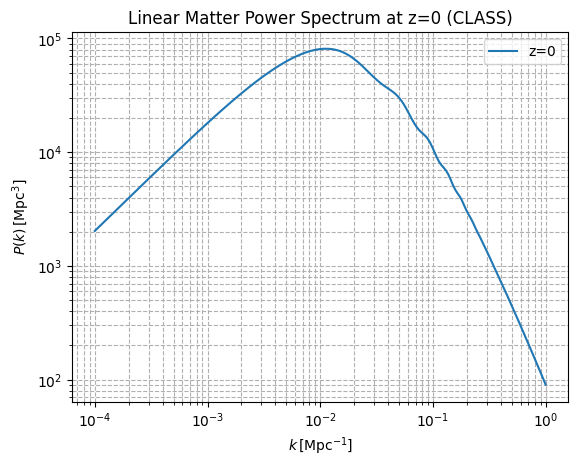

In [ ]:

k_cdm, pk_cdm_class = compute_pk(cdm_params)


plt.loglog(k_cdm, pk_cdm_class, label='z=0')
plt.xlabel(r'$k \, [\mathrm{Mpc}^{-1}]$')
plt.ylabel(r'$P(k) \, [\mathrm{Mpc}^3]$')
plt.title('Linear Matter Power Spectrum at z=0 (CLASS)')
plt.legend()
plt.grid(True, which='both', ls='--')
plt.show()


# Comparison Plots

In [ ]:
# Compute pairwise ratios
class_ehu = pk_cdm_class / (Pk_ehu)
class_ehu_sub = pk_cdm_class - Pk_ehu


plt.figure(figsize=(10, 6))
plt.plot(ks, class_ehu, label='class : ehu')
plt.xlabel('k')
plt.ylabel('Power Spectrum Ratio')
plt.title('Power Spectrum Ratios')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(ks, class_ehu_sub, label='class : ehu')
plt.xlabel('Frequency')
plt.ylabel('Power Spectrum Ratio')
plt.title('Power Spectrum Ratios')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
%pip install panda
import pandas as pd

  Preparing metadata (setup.py) ... done
  Created wheel for panda: filename=panda-0.3.1-py3-none-any.whl size=7239 sha256=9c686ab42c980e49a5c2e87c188d69f7530da62d696acdcf9e15d99bcd4b567c
  Stored in directory: /root/.cache/pip/wheels/df/5c/39/36f8dae25a1e88d6ec4411dec4a143781e64fdff6897758eec
Successfully built panda


In [ ]:
indices = np.linspace(0, len(k_s) - 1, 10, dtype=int)

ratio_table = pd.DataFrame({
    'k': np.array(ks)[indices],
    'Pk_analytic': np.array(Pk_ehu)[indices],
    'Pk_class': np.array(pk_cdm_class)[indices]
})

print("Matter power spectrum ratios:")
print(ratio_table)